# Aufgabe 22

In [144]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

Rosenbrockfuntkion (mit Parameter a=1 and b=100):
$f(x, y) = (1 - x)^2 + 100 \cdot (y - x^2)^2.$


In [145]:
# define the function f(x, y)
f = lambda x, y: (1-x)**2 + 100*(y-x**2)**2

Stellen Sie die Funktion für x ∈ [−2, 2] und y ∈ [−1, 3] als Höhenlinienplot (ContourPlot) mit Hilfe von matplotlib.pyplot.contour graphisch dar (siehe Online-Dokumentation
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html).
Für eine bessere Darstellung kann die logarithmierte Funktion dargestellt werden.

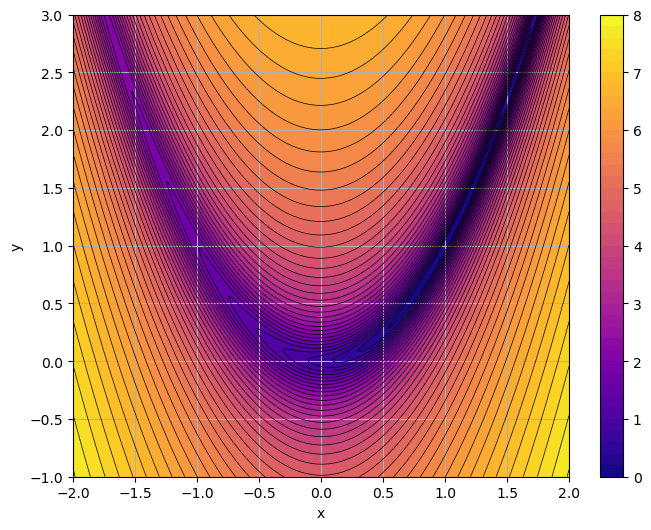

In [146]:
# Create a grid of x and y values
x = np.linspace(-2, 2, 500)
y = np.linspace(-1, 3, 500)
X, Y = np.meshgrid(x, y)

# Compute the function values
Z = f(X, Y)

# Apply logarithmic transformation for better visualization
Z_log = np.log1p(Z)

# Create the contour plot
plt.figure(figsize=(8, 6))
contour_filled = plt.contourf(X, Y, Z_log, levels=50, cmap='plasma')
contour_lines = plt.contour(X, Y, Z_log, levels=50, colors='black', linewidths=0.5)
plt.colorbar(contour_filled)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Bestimmen Sie mit Hilfe von a) einen Startpunkt x0 und berechnen Sie mit dem
mehrdimensionalen Newton-Verfahren das Minimum auf tol = 10−6 genau. Hinweis:
Im Minimum gilt $∂f/∂x (x, y) = 0$ und $∂f/∂y (x, y) = 0$

In [147]:
f_d = lambda x: np.array([2*x[0] - 2 - 400*x[0]*(x[1] - x[0]**2), 200*(x[1] - x[0]**2)])
J = lambda x: np.array([[1200*x[0]**2 - 400*x[1] + 2, -400*x[0]], [-400*x[0], 200]])

In [148]:
def newton(f, J, x0, tol=1.e-6):
    max_loops = 1000
    x = x0
    k = 0
    res = np.linalg.norm(f(x))
    while res > tol and k < max_loops:
        k += 1
        d = np.linalg.solve(J(x), f(x))
        x = x - d
        res = np.linalg.norm(f(x))
    return x, k

In [149]:
x0 = np.array([0, 0])
print(newton(f_d, J, x0))

x1 = np.array([-1, -1])
print(newton(f_d, J, x1))

x2 = np.array([-100, -500])
print(newton(f_d, J, x2))


(array([1., 1.]), 2)
(array([1., 1.]), 5)
(array([1., 1.]), 4)
